In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv("Twitter_Data.csv")

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.shape

(16090, 2)

In [5]:
df.category.value_counts()

 1.0    6675
 0.0    5572
-1.0    3842
Name: category, dtype: int64

In [6]:
df.clean_text.value_counts()

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples                     1
what now\nhaters will say was paid                                                                                                                                                                                                     1
rahul gandhi announced that congress will form government center will provide 72000 year poor families the country this announcement not like fake jumlas lakh modi its possible and will                                              1
this governor shames his office kalyan singh turns bjp ‘karyakarta’\nopenly campaigns for modi bjp ‘working ensure modi’ victory’\nopposition demands his sacking what’ the president waiting for with details                         1
ready make your family friends ready because you can tell your next 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,16089.0,0.176083,0.78912,-1.0,0.0,0.0,1.0,1.0


In [8]:
df.isnull().sum()

clean_text    1
category      1
dtype: int64

In [9]:
#we are neglecting the null values present in clean_text and category columns as they are not at all  required
df.dropna(axis = 0, inplace =True)

In [10]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [11]:
#label Encoding using sklearn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

list_col = list(df.columns)
list_df = []

for i in list_col:
  if df[i].dtype == 'object':
    list_df.append(i)

for i in list_df:
  df[i] = le.fit_transform(df[i])


In [12]:
df.head()

,clean_text,category
0,14325,-1.0
1,11724,0.0
2,14042,1.0
3,1411,1.0
4,1170,1.0


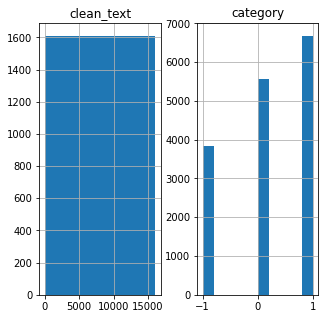

In [13]:
#Statistical Analysis
df.hist(figsize=(5,5))
plt.show()

In [14]:
df.corr()

,clean_text,category
clean_text,1.000000,-0.001829
category,-0.001829,1.000000


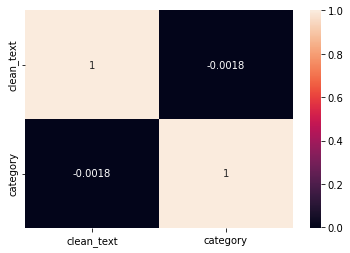

In [15]:
sns.heatmap(df.corr(), annot = True)

# NLTK implementation

In [16]:
!pip install scikit-plot

In [17]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Splitting of Train and Test data

In [18]:
y=df['category']
x=df.drop('category',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Feature Scaling

In [20]:
#scaling using sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

11261
4827
11261
4827


# ANN

In [23]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set with 30 epochs
classifier.fit(x_train,y_train,batch_size = 10, epochs=30)

Epoch 1/30
1127/1127 [==============================] - 4s 3ms/step - loss: 0.5294 - accuracy: 0.3440
Epoch 2/30
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4801 - accuracy: 0.3438
Epoch 3/30
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4797 - accuracy: 0.3438
Epoch 4/30
1127/1127 [==============================] - 2s 2ms/step - loss: 0.4798 - accuracy: 0.3438
Epoch 5/30
1127/1127 [==============================] - 2s 1ms/step - loss: 0.4797 - accuracy: 0.3438
Epoch 6/30
1127/1127 [==============================] - 2s 1ms/step - loss: 0.4799 - accuracy: 0.3438
Epoch 7/30
1127/1127 [==============================] - 2s 2ms/step - loss: 0.4797 - accuracy: 0.3438
Epoch 8/30
1127/1127 [==============================] - 2s 2ms/step - loss: 0.4798 - accuracy: 0.3438
Epoch 9/30
1127/1127 [==============================] - 2s 1ms/step - loss: 0.4796 - accuracy: 0.3438
Epoch 10/30
1127/1127 [==============================] - 2s 1ms/step - loss: 0.480

# Different Model Implementation

## KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Confusion Matrix:
 [[305 424 461]
 [304 775 620]
 [354 641 943]]
Training Score:
 57.67693810496404


In [27]:
knn.score(x_test,y_test)*100

41.9100890822457

## Random forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Confusion Matrix:
 [[369 355 466]
 [360 701 638]
 [425 611 902]]
Training Score:
 99.96447917591688


In [31]:
rfc.score(x_test,y_test)*100

40.85353221462606

## AdaBoostClassifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

Confusion Matrix:
 [[   2   10 1178]
 [   0   39 1660]
 [   3   18 1917]]
Training Score:
 42.61610869372169


In [33]:
adb.score(x_test,y_test)*100

40.563496996063805

## Support Vector Classifier

In [34]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

Confusion Matrix:
 [[   0    0 1190]
 [   0    0 1699]
 [   0    0 1938]]
Training Score:
 42.61610869372169


In [35]:
print("Accuracy score = " ,round(svc.score(x_test,y_test)*100))

Accuracy score =  40


In [40]:
svc.score(x_test,y_test)*100

40.1491609695463

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Training Score:\n",reg.score(x_train,y_train)*100)
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")


Training Score:
 42.065535920433355
r2 Score of test set : -1.1443591846459182


In [38]:
reg.score(x_test,y_test)*100

40.1491609695463

#Conclusion

In [41]:
#we have tried to create a model for the twitter sentiment analysis 
#various model with their accuracies are listed below
#KNN Training Score:57.67693810496404 ,test score 41.9100890822457
#Random forest Training Score:99.96447917591688 , test score 40.85353221462606
#AdaBoostClassifier Training Score:42.61610869372169 test score 40.563496996063805
#Support Vector Classifier Training Score: 42.61610869372169 test score 40.1491609695463
#Logistic Regression Training Score:42.065535920433355 test score 40.1491609695463

  




In [41]:
## From the above we can conclude that KNN can be considered as the most successful model for twitter sentiment analysis